# Ronchi Grating Optics Calculation
====================================================

- Sylvie Dagoret-Campagne
- January 10th 2017


SageMath using jupyter : sagemath must be installed on your computer

To lauch that sheet do in shell

sage -n jupyter



## Goal
----------

The goal of this Sagemath Jupyter worksheet is the calculation of the dispersive pattern of the Ronchi Grating.
One has to specify the parameters of the pattern.
We know the dispersion law of the light intensity is done according the law:

$$
I(\theta) = \frac{I_0}{N^2} \left( \frac{\sin \beta}{\beta} \right)^2 \cdot \left( \frac{\sin N \alpha}{\sin \alpha} \right)^2
$$

where
$$
\begin{array} {ccc}
\alpha & = & \frac{\pi a }{\lambda} \sin \theta \\
\beta & = & \frac{\pi b }{\lambda} \sin \theta
\end{array}
$$
- $\theta$ is the angle of dispersion
- $\lambda$ is the wavelength
- $a$ is the line groove pitch of Ronchi grating
- $b$ is the line width of Ronchi Gration


## Definitions of Ronchi Grating parameters
-----------------------------------------------------

- Grating 200 lines per mm

In [74]:
r=200 # number of lines per mm
a0=10^-3/r  # line spacing in meter unit

In [99]:
#dd=0.0508 # size of Ronchi Grating in meter
dd=0.00508 # size of Ronchi Grating in meter(Too small number on purpose because interferance would be too sharp)
NN=dd/a0   # total number of lines

In [76]:
b0=a0/2 # line width in meter unit

## Selection of the wavelength
--------------------------------------

In [77]:
wl0=600e-9 # default wavelength in meter
wl1=800e-9 # default wavelength in meter
wl2=1000e-9 # default wavelength in meter
wl3=400e-9 # default wavelength in meter

### simple check of plotting functions à la sagemath fashion

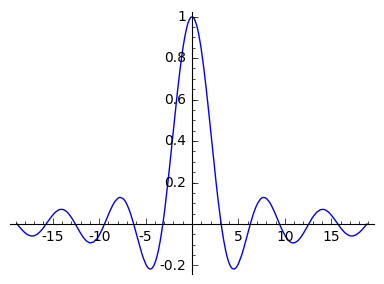

In [78]:
plot(sin(x)/x,-6*pi,6*pi,figsize=4)

In [79]:
def sinc(x): return sin(x)/x

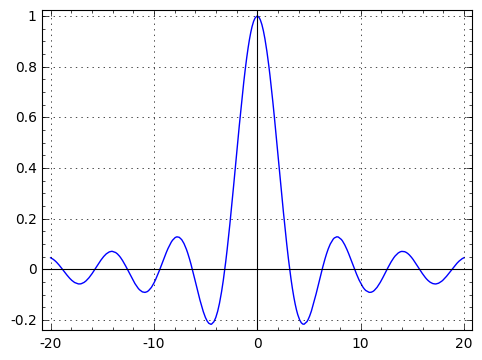

In [80]:
var('y')
plot(sinc(y),-20,20,figsize=5,frame=True,gridlines=True)

## Diffraction pattern

In [81]:
var("th b wl")
def diffrac_pattern(th,b,wl):
    '''
    diffrac_pattern:
    Compute the diffraction pattern
    - th : the angle of diffraction in rad
    - b : the width of the slot in m
    - wl : the wavelength in m
    '''
    beta=pi*b/wl*sin(th)
    sinus_card=sin(beta)/beta
    return sinus_card^2

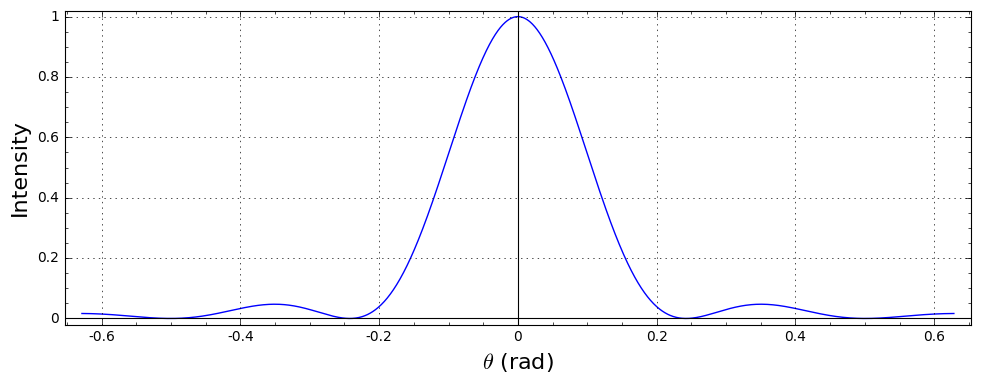

In [82]:
plot(diffrac_pattern(th,b0,wl0),(th,-pi/5.,pi/5.),figsize=(10,4),frame=True,gridlines=True,plot_points=1000,axes_labels=['$\\theta$ (rad)','Intensity'])

The above diffraction pattern is broad enough, such the central peak contains the first order.

## Interference pattern

In [83]:
var("th a wl N")
def interference_pattern(th,a,wl,N):
    """
    Interference_pattern:
    Compute the diffrac pattern
    - th : the angle of diffraction in rad
    - b : the width of the slot in m
    - wl : the wavelength in m
    
    """
    
    alpha=pi*(a/wl)*sin(th)
    numer=sin(N*alpha)
    denom=sin(alpha)
    ratio=numer/denom
    return ratio^2/NN^2
   

In [84]:
wl0/a0

0.120000000000000

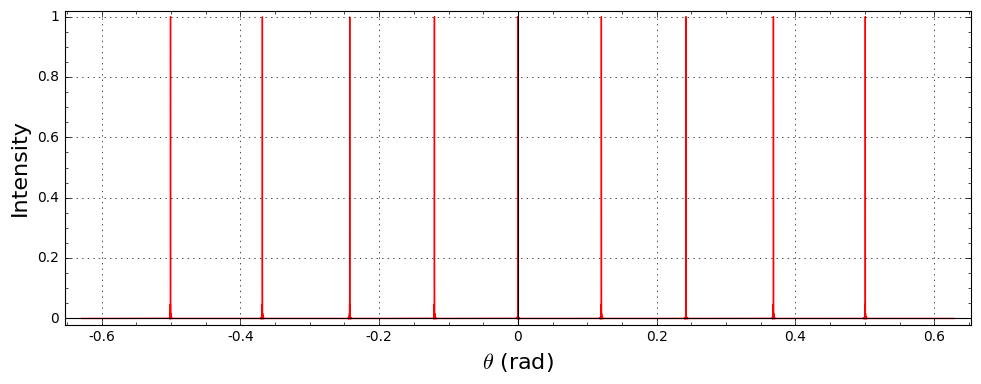

In [85]:
plot(interference_pattern(th,a0,wl0,NN),(th,-pi/5.,pi/5.),figsize=(10,4),color="red",frame=True,gridlines=True,plot_points=10000,axes_labels=['$\\theta$ (rad)','Intensity'])

The interference pattern is shown on figure for $\lambda = 600~nm$
It is obvious that all the orders are separated by

$$
\delta \theta = \frac{\lambda}{a}
$$

## Ronchi Grating Response
-----------------------------------


Here the product of interference and diffractive pattern are multiplied

In [86]:
var("th a b wl N")
def ronchi_pattern(th,a,b,wl,N):
    prod=diffrac_pattern(th,b,wl)*interference_pattern(th,a,wl,N)
    return prod

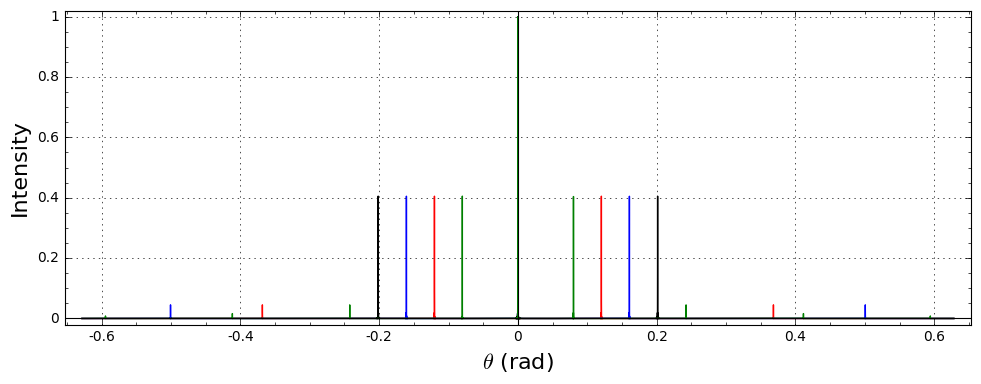

In [87]:
p1=plot(ronchi_pattern(th,a0,b0,wl0,NN),(th,-pi/5.,pi/5.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='red',axes_labels=['$\\theta$ (rad)','Intensity'])
p2=plot(ronchi_pattern(th,a0,b0,wl1,NN),(th,-pi/5.,pi/5.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='blue',axes_labels=['$\\theta$ (rad)','Intensity'])
p3=plot(ronchi_pattern(th,a0,b0,wl2,NN),(th,-pi/5.,pi/5.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='black',axes_labels=['$\\theta$ (rad)','Intensity'])
p4=plot(ronchi_pattern(th,a0,b0,wl3,NN),(th,-pi/5.,pi/5.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='green',axes_labels=['$\\theta$ (rad)','Intensity'])
p1+p2+p3+p4

_comment :_
- ** On this plot, one sees the 0th,1st and 3rd order. It is true the second order has disappeared as C. Stubb stated **
- ** notice 4 wavelengths are there : $\lambda = 400, 600, 800, 1000$ nm **

In [88]:
var("sth a b wl N")
def ronchi_pattern_sinth(sth,a,b,wl,N):
    """
    ronchi_pattern_sinth(sth,a,b,wl,N) :
    Ronchi- Grating  in sin theta horizontal axis
    shows in sin theta
    
    """
    th=asin(sth)
    prod=diffrac_pattern(th,b,wl)*interference_pattern(th,a,wl,N)
    return prod


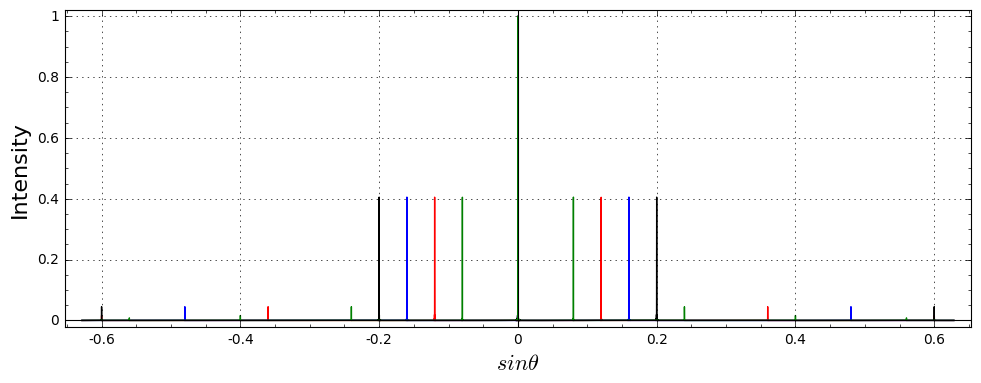

In [89]:
p1=plot(ronchi_pattern_sinth(sth,a0,b0,wl0,NN),(sth,-pi/5.,pi/5.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='red',axes_labels=['$sin \\theta$','Intensity'])
p2=plot(ronchi_pattern_sinth(sth,a0,b0,wl1,NN),(sth,-pi/5.,pi/5.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='blue',axes_labels=['$sin \\theta$ ','Intensity'])
p3=plot(ronchi_pattern_sinth(sth,a0,b0,wl2,NN),(sth,-pi/5.,pi/5.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='black',axes_labels=['$sin \\theta$ ','Intensity'])
p4=plot(ronchi_pattern_sinth(sth,a0,b0,wl3,NN),(sth,-pi/5.,pi/5.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='green',axes_labels=['$sin \\theta$ ','Intensity'])
p1+p2+p3+p4

In [90]:
var("x d a b wl N")
def ronchi_pattern_focalp(x,d,a,b,wl,N):
    """
    ronchi_pattern_focalp(x,d,a,b,wl,N) :
    shows in focal plane
    
    - x and d in same unit (better in mm)
    """
    th=atan(x/d)
    prod=diffrac_pattern(th,b,wl)*interference_pattern(th,a,wl,N)
    return prod

In [91]:
DD=150 # mm distance of Ronchi to Focal Plane

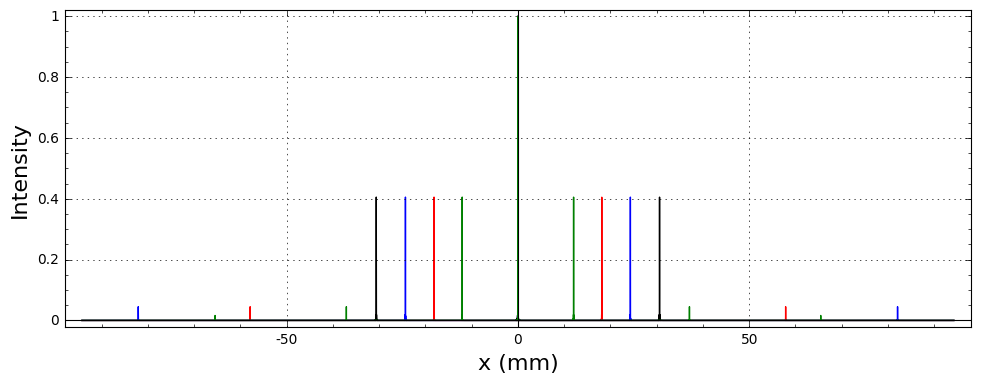

In [92]:
p1=plot(ronchi_pattern_focalp(x,DD,a0,b0,wl0,NN),(x,-pi*30.,pi*30.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='red',axes_labels=['x (mm)','Intensity'])
p2=plot(ronchi_pattern_focalp(x,DD,a0,b0,wl1,NN),(x,-pi*30.,pi*30.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='blue',axes_labels=['x (mm)','Intensity'])
p3=plot(ronchi_pattern_focalp(x,DD,a0,b0,wl2,NN),(x,-pi*30.,pi*30.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='black',axes_labels=['x (mm)','Intensity'])
p4=plot(ronchi_pattern_focalp(x,DD,a0,b0,wl3,NN),(x,-pi*30.,pi*30.),figsize=(10,4),frame=True,gridlines=True,plot_points=10000,color='green',axes_labels=['x (mm)','Intensity'])
p1+p2+p3+p4

** I don't understand from where it comes the second order disapear. **

## Compute relative intensity
-----------------------------------

Interference peak probably too sharp.
Should better sample the function.

TBD

In [93]:
I_order0= limit(ron
                chi_pattern(x,a0,b0,wl0,NN),x=0)

In [94]:
print "Relative Intensity at order 0 = I0=", I_order0

Relative Intensity at order 0 = I0= 1


In [117]:
I_order_p1=limit(ronchi_pattern(x,a0,b0,wl0,NN),x=0.12)
I_order_m1=limit(ronchi_pattern(x,a0,b0,wl0,NN),x=-0.12,taylor=True)

In [116]:
print "Relative Intensity at order 1 : I1=", n(I_order_p1), " , ",n(I_order_m1)

Relative Intensity at order 1 : I1= 0.00667796565399529  ,  0.00667796565399529


In [120]:
first_order=wl0/a0

In [122]:
I_order_p1=ronchi_pattern(first_order,a0,b0,wl0,NN)
I_order_m1=ronchi_pattern(-first_order,a0,b0,wl0,NN)

In [123]:
print "Relative Intensity at order 1 : I1=", n(I_order_p1), " , ",n(I_order_m1)

Relative Intensity at order 1 : I1= 0.00667796565399573  ,  0.00667796565399573
